NAME: Oluwaseun A. Dada
Assignnment #2: Stock forecasting

-Set up the most basic analytics pipeline for the forecast project.
–Use close price as input
–Create a label 1-day ahead
–Train your linear model
–Create a prediction
–Visualize prediction and price in same chart

# Step 1 - get data

In [1]:
import datetime as dt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# https://stackoverflow.com/a/50970152
pd.core.common.is_list_like = pd.api.types.is_list_like
# you have to install pandas_datareader module i Anaconda Navigator:
# http://docs.anaconda.com/anaconda/navigator/tutorials/manage-packages/
from pandas_datareader.data import DataReader

In [2]:
# Define timeframe of stocks we retreive 
end = dt.datetime.now() 
start = end - dt.timedelta(days=5*365)

In [3]:
# Use DataReader to get Apples stock data from IEX https://iextrading.com/developer/
df = DataReader('AAPL','iex', start, end)
#df = DataReader('MU','iex', start, end)


5y


In [4]:
df.dtypes

open      float64
high      float64
low       float64
close     float64
volume      int64
dtype: object

In [5]:
df.columns

Index(['open', 'high', 'low', 'close', 'volume'], dtype='object')

In [6]:
df.head()

,open,high,low,close,volume
date,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122


In [7]:
df.tail()

,open,high,low,close,volume
date,,,,,
2018-10-09,223.64,227.27,222.2462,226.87,26891029
2018-10-10,225.46,226.35,216.0500,216.36,41990554
2018-10-11,214.52,219.50,212.3200,214.45,53124392
2018-10-12,220.42,222.88,216.8400,222.11,40337851
2018-10-15,221.16,221.83,217.2700,217.36,30791007


In [8]:
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')

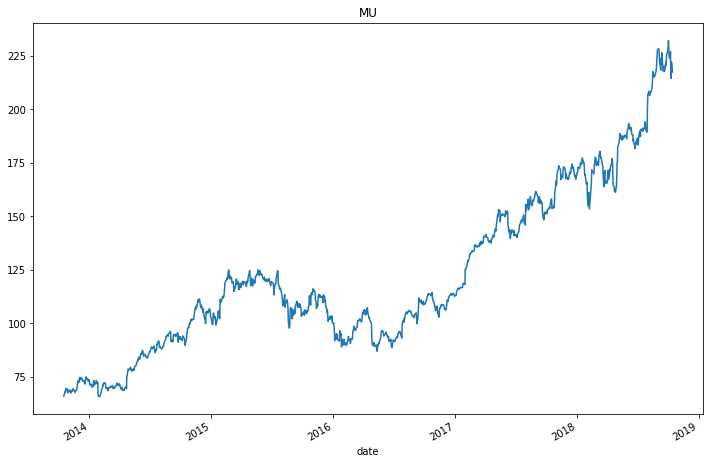

In [9]:
df.close.plot(figsize=(12,8), title='MU')

In [10]:
df.head()

,open,high,low,close,volume
date,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122


# Step 2 - implement 2 features and visualize the price and the features in the same graph

In [11]:
# https://www.investopedia.com/articles/technical/081501.asp
df['momentum'] = df.close - df.close.shift(1)
df.head(10)

,open,high,low,close,volume,momentum
date,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661
2013-10-24,68.6722,69.6493,68.3386,69.5760,96191095,0.9091
2013-10-25,69.4982,69.7487,68.6866,68.7975,84448133,-0.7785
2013-10-28,69.2006,69.4570,68.4380,69.3100,137610123,0.5125
2013-10-29,70.1463,70.5361,67.3040,67.5836,158952115,-1.7264


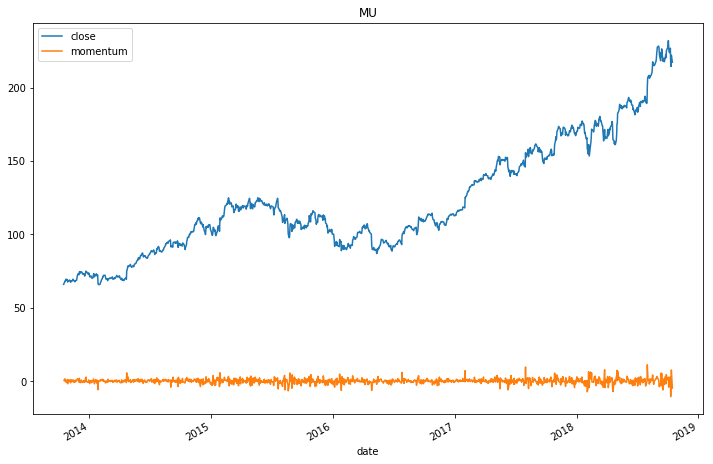

In [12]:
df[['close', 'momentum']].plot(figsize=(12,8), title='MU')

# Step 3 - do a regression based on the features, forecast 1-day ahead

In [13]:
df.head()

,open,high,low,close,volume,momentum
date,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661


Calculate change between days using log returns between two consecutive days

In [14]:
df["log_ret"] = np.log(df["close"]/df["close"].shift(1))

In [15]:
df.head(10)

,open,high,low,close,volume,momentum,log_ret
date,,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN,NaN
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748
2013-10-24,68.6722,69.6493,68.3386,69.5760,96191095,0.9091,0.013152
2013-10-25,69.4982,69.7487,68.6866,68.7975,84448133,-0.7785,-0.011252
2013-10-28,69.2006,69.4570,68.4380,69.3100,137610123,0.5125,0.007422
2013-10-29,70.1463,70.5361,67.3040,67.5836,158952115,-1.7264,-0.025224


Max value:  0.07879405422991285
Min value:  -0.08330285327371977


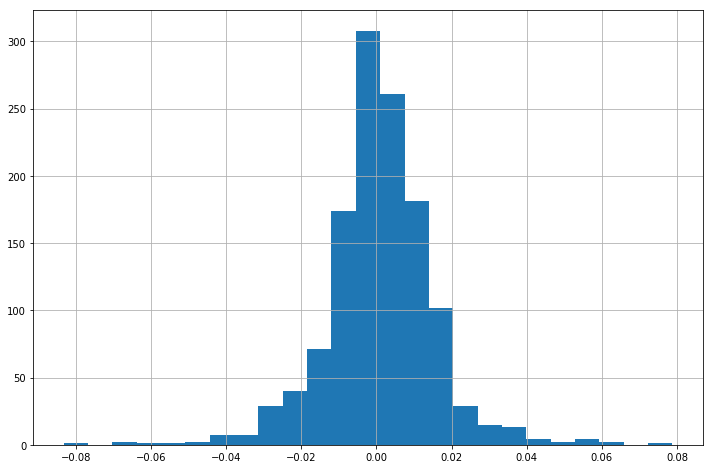

In [16]:
print("Max value: ", df['log_ret'].max())
print("Min value: ", df['log_ret'].min())
df['log_ret'].hist(bins=25, figsize=(12,8))
plt.show()

# Step 4 - plot (as a line) the regression and expected output, make the plot zoomable

In [17]:
df.head()

,open,high,low,close,volume,momentum,log_ret
date,,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN,NaN
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748


In [18]:
# we are using a numpy WHERE function to filter the 'log_ret' column of the data frame. 
# Condition (WHERE clause): if the corresponding 'log_ret' value is less than 25 percentile return 1 else return 0
# result will be stored in a new column for 'crash'
# notice the new column: 'crash'
df['crash'] = np.where(df['log_ret'] < df['log_ret'].quantile(0.25), 1,0)
df.head(10)

,open,high,low,close,volume,momentum,log_ret,crash
date,,,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN,NaN,0
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664,0
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213,0
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871,0
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0
2013-10-24,68.6722,69.6493,68.3386,69.5760,96191095,0.9091,0.013152,0
2013-10-25,69.4982,69.7487,68.6866,68.7975,84448133,-0.7785,-0.011252,1
2013-10-28,69.2006,69.4570,68.4380,69.3100,137610123,0.5125,0.007422,0
2013-10-29,70.1463,70.5361,67.3040,67.5836,158952115,-1.7264,-0.025224,1


In [19]:
# we are using a numpy WHERE function to filter the 'log_ret' column of the data frame. 
# Condition (WHERE clause): if the corresponding 'log_ret' value is less than 50 percentile return 1 else return 0
# result will be stored in a new column for 'down'
# notice the new column: 'down'
a = df['log_ret'] < df['log_ret'].quantile(0.5)
b = df['log_ret'] > df['log_ret'].quantile(0.25)
#b *a 

In [20]:
# outcome should only be true when both are true
df['down'] = np.where(a * b, 1,0)
#df

C:\tools\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [21]:
# we are using a numpy WHERE function to filter the 'log_ret' column of the data frame. 
# Condition (WHERE clause): if the corresponding 'log_ret' value is less than 75 percentile return 1 else return 0
# result will be stored in a new column for 'up'
# notice the new column: 'up'

a = df['log_ret'] < df['log_ret'].quantile(0.75)
b = df['log_ret'] > df['log_ret'].quantile(0.5)

df['up'] = np.where(a * b, 1,0)
#df

C:\tools\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [22]:
# we are using a numpy WHERE function to filter the 'log_ret' column of the data frame. 
# Condition (WHERE clause): if the corresponding 'log_ret' value is less than 100 percentile return 1 else return 0
# result will be stored in a new column for 'jump'
# notice the new column: 'jump'
a = df['log_ret'] < df['log_ret'].quantile(1)
b = df['log_ret'] > df['log_ret'].quantile(0.75)

df['jump'] = np.where(a * b, 1,0)


C:\tools\Anaconda3\lib\site-packages\pandas\core\computation\expressions.py:180: UserWarning: evaluating in Python space because the '*' operator is not supported by numexpr for the bool dtype, use '&' instead
  .format(op=op_str, alt_op=unsupported[op_str]))


In [23]:
df[['close','momentum','crash','up','down','jump']]

,close,momentum,crash,up,down,jump
date,,,,,,
2013-10-17,65.9907,NaN,0,0,0,0
2013-10-18,66.5649,0.5742,0,0,0,1
2013-10-21,68.1963,1.6314,0,0,0,1
2013-10-22,68.0008,-0.1955,0,0,1,0
2013-10-23,68.6669,0.6661,0,0,0,1
2013-10-24,69.5760,0.9091,0,0,0,1
2013-10-25,68.7975,-0.7785,1,0,0,0
2013-10-28,69.3100,0.5125,0,1,0,0
2013-10-29,67.5836,-1.7264,1,0,0,0


In [24]:
# calculate standardisation value for the data
std = (df['log_ret'] - df['log_ret'].mean())/(df['log_ret'].std())
std.head()

date
2013-10-17         NaN
2013-10-18    0.538254
2013-10-21    1.623049
2013-10-22   -0.266443
2013-10-23    0.613894
Name: log_ret, dtype: float64

Max value: 5.430891757839674
Max value: -5.87776624057741


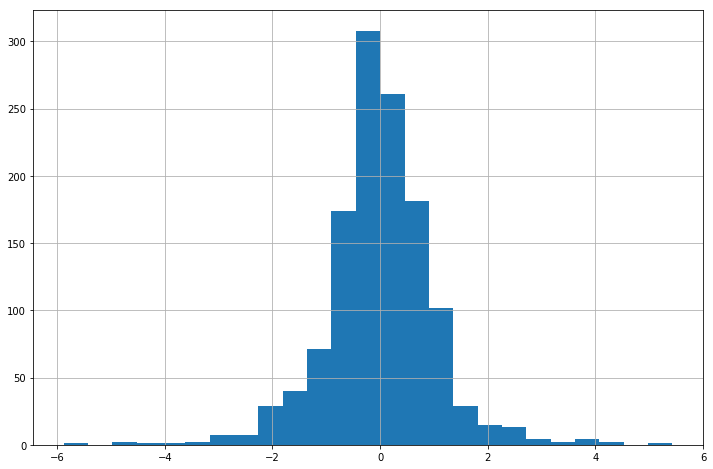

In [25]:
print("Max value:", std.max())
print("Max value:", std.min())
std.hist(bins=25,figsize=(12,8))
plt.show()

In [26]:
#Given that date is our indexes, we can resample as follows
# Here we make each row the mean values of the data that month
df.resample("M").mean().mean()

open        1.225821e+02
high        1.236078e+02
low         1.215642e+02
close       1.226104e+02
volume      4.490681e+07
momentum    1.130997e-01
log_ret     9.404273e-04
crash       2.505810e-01
down        2.465762e-01
up          2.464028e-01
jump        2.518129e-01
dtype: float64

In [27]:
df.resample("M").mean().count()

open        61
high        61
low         61
close       61
volume      61
momentum    61
log_ret     61
crash       61
down        61
up          61
jump        61
dtype: int64

In [28]:
df.head()

,open,high,low,close,volume,momentum,log_ret,crash,down,up,jump
date,,,,,,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN,NaN,0,0,0,0
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664,0,0,0,1
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213,0,0,0,1
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871,0,1,0,0
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0,0,0,1


In [29]:
# stdNorm: standard normal distribution - In statistics, stdNorm is the process of putting different variables on the same scale.  
# it’s a normal distribution with a mean of 0 and a standard deviation of 1. 
# This process allows you to compare scores between different types of variables. 

df["stdNorm"] = (df['log_ret'] - df['log_ret'].mean())/(df['log_ret'].max() - df['log_ret'].min())
df["stdL_R"] = (df['log_ret'] - df['log_ret'].mean())/(df['log_ret'].std())
df.describe()

,open,high,low,close,volume,momentum,log_ret,crash,down,up,jump,stdNorm,stdL_R
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1257.000000,1257.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.257000e+03,1.257000e+03
mean,122.283337,123.300450,121.283381,122.319742,4.443072e+07,0.120421,0.000948,0.249603,0.248808,0.248808,0.248808,-4.747374e-18,-5.246400e-17
std,38.427186,38.726654,38.151584,38.440432,2.516639e+07,1.792652,0.014334,0.432955,0.432494,0.432494,0.432494,8.842782e-02,1.000000e+00
min,65.149800,65.985200,64.935300,65.755300,1.147592e+07,-10.510000,-0.083303,0.000000,0.000000,0.000000,0.000000,-5.197581e-01,-5.877766e+00
25%,94.160700,95.210250,93.432050,94.143325,2.663289e+07,-0.677600,-0.005898,0.000000,0.000000,0.000000,0.000000,-4.223751e-02,-4.776496e-01
50%,110.901200,112.050500,110.032900,111.194950,3.760330e+07,0.070000,0.000676,0.000000,0.000000,0.000000,0.000000,-1.681916e-03,-1.902021e-02
75%,150.912775,151.549300,149.917400,150.841475,5.527668e+07,0.978800,0.008432,0.000000,0.000000,0.000000,0.000000,4.616614e-02,5.220771e-01
max,230.780000,233.470000,229.780000,232.070000,2.668336e+08,11.170900,0.078794,1.000000,1.000000,1.000000,1.000000,4.802419e-01,5.430892e+00


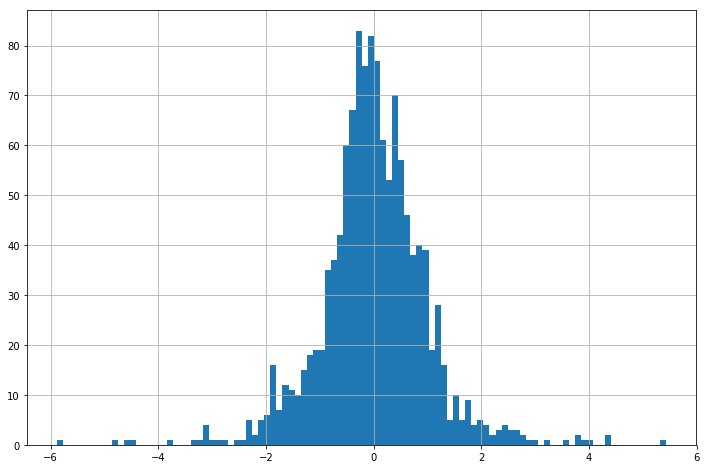

In [30]:
df["stdL_R"].hist(bins=100, figsize=(12,8))
plt.show()

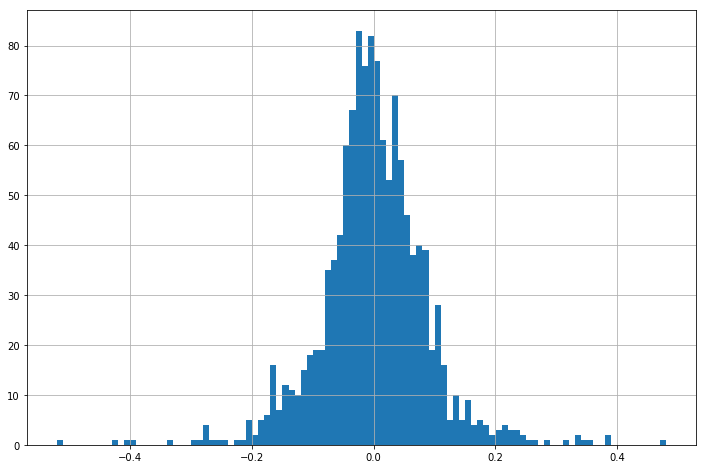

In [31]:
df["stdNorm"].hist(bins=100, figsize=(12,8))
plt.show()

CALCULATE MOVING AVERAGES

In [32]:
df.head()

,open,high,low,close,volume,momentum,log_ret,crash,down,up,jump,stdNorm,stdL_R
date,,,,,,,,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN,NaN,0,0,0,0,NaN,NaN
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664,0,0,0,1,0.047597,0.538254
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213,0,0,0,1,0.143523,1.623049
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871,0,1,0,0,-0.023561,-0.266443
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0,0,0,1,0.054285,0.613894


In [33]:
df.reset_index(inplace=True)

In [34]:
df.head()

,date,open,high,low,close,volume,momentum,log_ret,crash,down,up,jump,stdNorm,stdL_R
0,2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN,NaN,0,0,0,0,NaN,NaN
1,2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664,0,0,0,1,0.047597,0.538254
2,2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213,0,0,0,1,0.143523,1.623049
3,2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871,0,1,0,0,-0.023561,-0.266443
4,2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0,0,0,1,0.054285,0.613894


In [35]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', context='talk', palette='Dark2')

my_year_month_fmt = mdates.DateFormatter('%m/%y')
data = df

In [36]:
data['MA_14'] = data.close.rolling(14).mean()
data[['close','MA_14']].head(30)

,close,MA_14
0,65.9907,NaN
1,66.5649,NaN
2,68.1963,NaN
3,68.0008,NaN
4,68.6669,NaN
5,69.5760,NaN
6,68.7975,NaN
7,69.3100,NaN
8,67.5836,NaN
9,68.6586,NaN


In [37]:
data['MA_3'] = data.close.rolling(3).mean()
data['MA_7'] = data.close.rolling(7).mean()
data['MA_14'] = data.close.rolling(14).mean()
data['MA_21'] = data.close.rolling(21).mean()


In [38]:
data.head()

,date,open,high,low,close,volume,momentum,log_ret,crash,down,up,jump,stdNorm,stdL_R,MA_14,MA_3,MA_7,MA_21
0,2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664,0,0,0,1,0.047597,0.538254,NaN,NaN,NaN,NaN
2,2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213,0,0,0,1,0.143523,1.623049,NaN,66.917300,NaN,NaN
3,2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871,0,1,0,0,-0.023561,-0.266443,NaN,67.587333,NaN,NaN
4,2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0,0,0,1,0.054285,0.613894,NaN,68.288000,NaN,NaN


In [39]:
data.set_index('date', inplace=True)

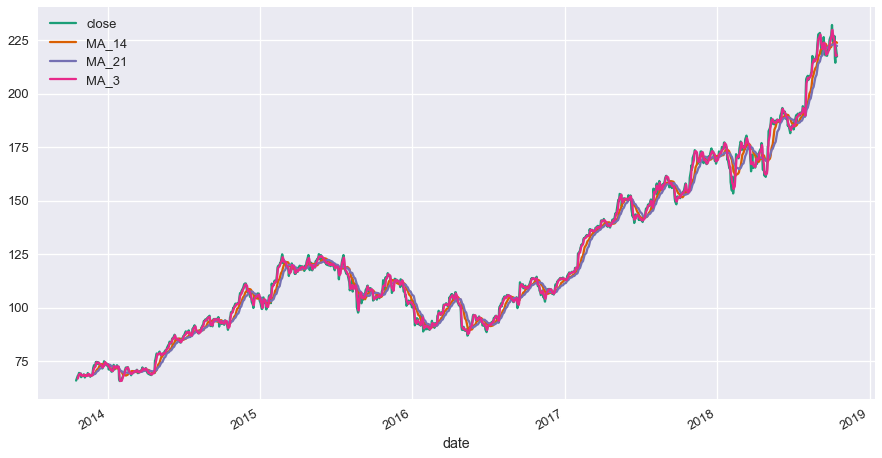

In [40]:
data[['close','MA_14','MA_21','MA_3']].plot(figsize=(15,8))

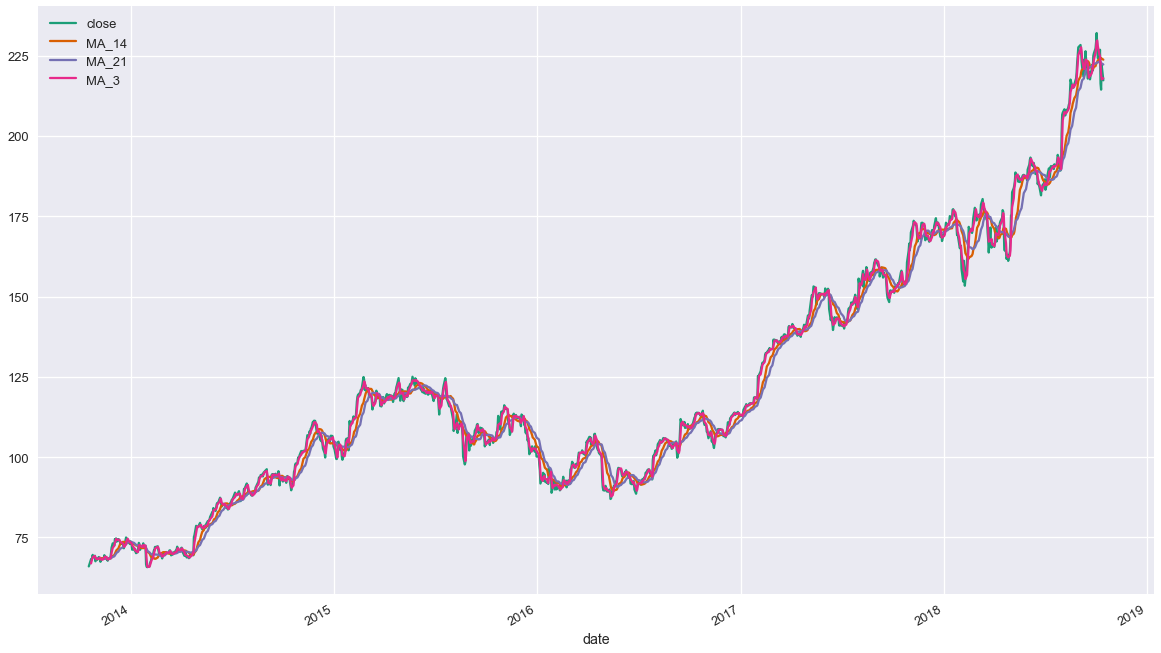

In [41]:
data[['close','MA_14','MA_21','MA_3']].plot(figsize=(20,12))

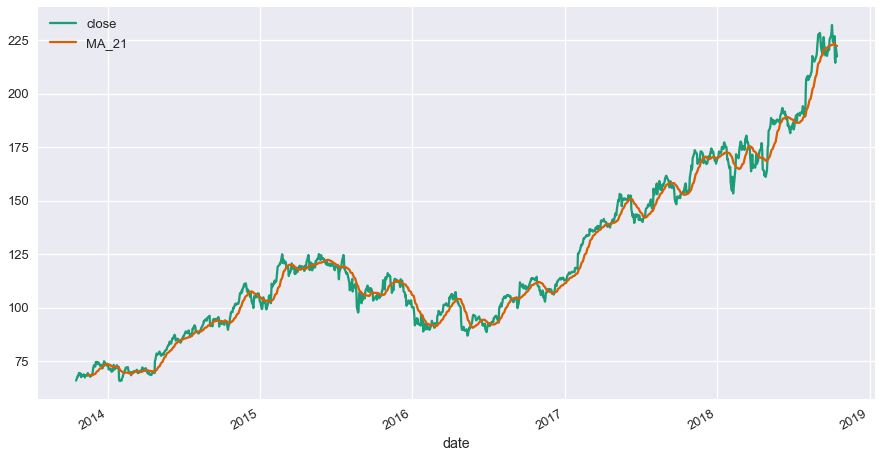

In [42]:
data[['close','MA_21']].plot(figsize=(15,8))

In [43]:
data.head()

,open,high,low,close,volume,momentum,log_ret,crash,down,up,jump,stdNorm,stdL_R,MA_14,MA_3,MA_7,MA_21
date,,,,,,,,,,,,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,NaN,NaN,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664,0,0,0,1,0.047597,0.538254,NaN,NaN,NaN,NaN
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213,0,0,0,1,0.143523,1.623049,NaN,66.917300,NaN,NaN
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871,0,1,0,0,-0.023561,-0.266443,NaN,67.587333,NaN,NaN
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0,0,0,1,0.054285,0.613894,NaN,68.288000,NaN,NaN


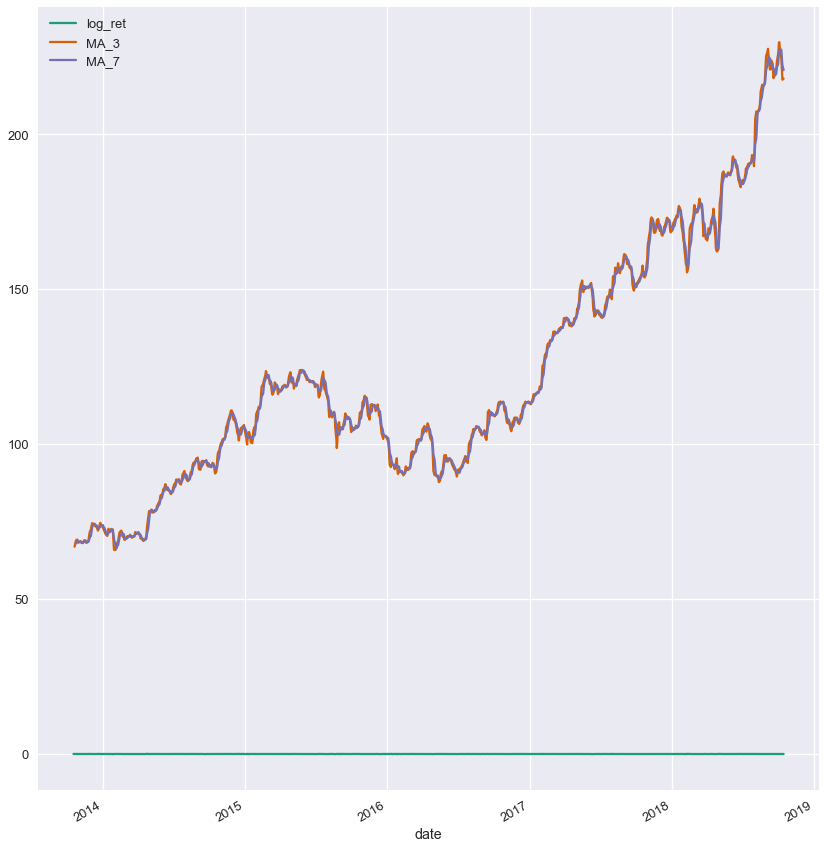

In [44]:
# create plot for M(3,7) on the log return with price
# assumption: price = closing price ('close')

data[['log_ret','MA_3','MA_7']].plot(figsize=(14,16))

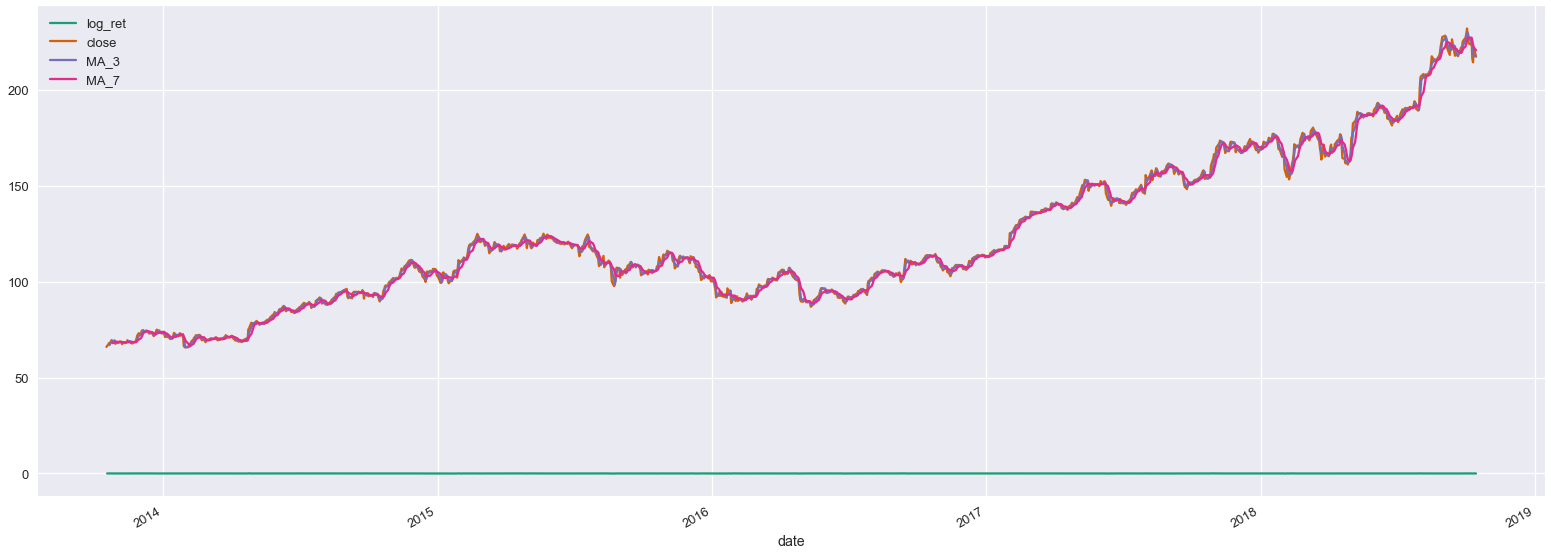

In [45]:
# create plot for M(3,7) on the log return with price
# assumption: price = closing price ('close')

data[['log_ret','close','MA_3','MA_7']].plot(figsize=(27,10))

# CONSTRUCTING A FORECAST FOR THE TIME SERIES

In [46]:
data['label'] = data['close'].shift(-1)
data[['close','label']].head()

,close,label
date,,
2013-10-17,65.9907,66.5649
2013-10-18,66.5649,68.1963
2013-10-21,68.1963,68.0008
2013-10-22,68.0008,68.6669
2013-10-23,68.6669,69.5760


In [47]:
data[['close','label']].tail()

,close,label
date,,
2018-10-09,226.87,216.36
2018-10-10,216.36,214.45
2018-10-11,214.45,222.11
2018-10-12,222.11,217.36
2018-10-15,217.36,NaN


# Turn data intro arrays and scale data

In [48]:
data.fillna(0,inplace=True)

- Set up the most basic analytics pipeline for the forecast project. 

– Use close price as input 

– Create a label 1-day ahead 

– Train your linear model –Create a prediction 

– Visualize prediction and price in same char

In [49]:
data['ASY_3'] = (data.close - data.close.shift(1)).rolling(3).sum()/3
data.ASY_3

date
2013-10-17         NaN
2013-10-18         NaN
2013-10-21         NaN
2013-10-22    0.670033
2013-10-23    0.700667
2013-10-24    0.459900
2013-10-25    0.265567
2013-10-28    0.214367
2013-10-29   -0.664133
2013-10-30   -0.046300
2013-10-31   -0.312800
2013-11-01    0.146167
2013-11-04    0.080833
2013-11-05    0.119767
2013-11-06    0.171400
2013-11-07   -0.491200
2013-11-08   -0.080633
2013-11-11   -0.082067
2013-11-12    0.329700
2013-11-13    0.003233
2013-11-14    0.399600
2013-11-15    0.218467
2013-11-18   -0.087933
2013-11-19   -0.377600
2013-11-20   -0.438167
2013-11-21    0.109967
2013-11-22    0.010967
2013-11-25    0.383300
2013-11-26    0.537833
2013-11-27    1.147267
                ...   
2018-09-04    1.793333
2018-09-05    0.613333
2018-09-06   -1.510000
2018-09-07   -2.353333
2018-09-10   -2.846667
2018-09-11    0.250000
2018-09-12   -0.076667
2018-09-13    2.693333
2018-09-14   -0.003333
2018-09-17   -1.063333
2018-09-18   -2.723333
2018-09-19   -1.823333
2018-0

In [50]:
data['MA_5'] = data.close.rolling(5).mean()
data.MA_5

date
2013-10-17          NaN
2013-10-18          NaN
2013-10-21          NaN
2013-10-22          NaN
2013-10-23     67.48392
2013-10-24     68.20098
2013-10-25     68.64750
2013-10-28     68.87024
2013-10-29     68.78680
2013-10-30     68.78514
2013-10-31     68.54426
2013-11-01     68.38918
2013-11-04     68.30740
2013-11-05     68.53686
2013-11-06     68.51240
2013-11-07     68.32358
2013-11-08     68.41696
2013-11-11     68.29476
2013-11-12     68.23190
2013-11-13     68.22438
2013-11-14     68.63666
2013-11-15     68.75326
2013-11-18     68.74222
2013-11-19     68.73012
2013-11-20     68.58188
2013-11-21     68.39706
2013-11-22     68.26046
2013-11-25     68.39496
2013-11-26     68.75940
2013-11-27     69.57406
                ...    
2018-09-04    224.74000
2018-09-05    226.17400
2018-09-06    226.19800
2018-09-07    225.45200
2018-09-10    223.59200
2018-09-11    222.69000
2018-09-12    221.53000
2018-09-13    222.19200
2018-09-14    222.70000
2018-09-17    222.61000
2018-09-18 

In [51]:
data.head()

,open,high,low,close,volume,momentum,log_ret,crash,down,up,jump,stdNorm,stdL_R,MA_14,MA_3,MA_7,MA_21,label,ASY_3,MA_5
date,,,,,,,,,,,,,,,,,,,,
2013-10-17,65.3995,66.0273,65.3602,65.9907,63398335,0.0000,0.000000,0,0,0,0,0.000000,0.000000,0.0,0.000000,0.0,0.0,66.5649,NaN,NaN
2013-10-18,66.1856,66.6133,66.1490,66.5649,72635570,0.5742,0.008664,0,0,0,1,0.047597,0.538254,0.0,0.000000,0.0,0.0,68.1963,NaN,NaN
2013-10-21,66.9416,68.5806,66.9089,68.1963,99526945,1.6314,0.024213,0,0,0,1,0.143523,1.623049,0.0,66.917300,0.0,0.0,68.0008,NaN,NaN
2013-10-22,68.8560,69.1234,66.4524,68.0008,133515753,-0.1955,-0.002871,0,1,0,0,-0.023561,-0.266443,0.0,67.587333,0.0,0.0,68.6669,0.670033,NaN
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0,0,0,1,0.054285,0.613894,0.0,68.288000,0.0,0.0,69.5760,0.700667,67.48392


In [52]:
data.dropna(inplace=True)

In [53]:
# X is the featureset, do not include labels
# X holds the input data

X = np.array(data[['close', 'ASY_3', 'MA_5']])

In [54]:
X

array([[ 68.6669    ,   0.70066667,  67.48392   ],
       [ 69.576     ,   0.4599    ,  68.20098   ],
       [ 68.7975    ,   0.26556667,  68.6475    ],
       ...,
       [214.45      ,  -3.10666667, 221.148     ],
       [222.11      ,  -1.58666667, 220.712     ],
       [217.36      ,   0.33333333, 219.43      ]])

In [55]:
# y refer to the labels
# y holds the expected output
y = np.array(data['label'])
y

array([ 69.576 ,  68.7975,  69.31  , ..., 222.11  , 217.36  ,   0.    ])

In [56]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression, ElasticNetCV, ridge
from sklearn.neural_network import MLPRegressor

In [57]:
y[:6]

array([69.576 , 68.7975, 69.31  , 67.5836, 68.6586, 68.3716])

In [58]:
X[:6]

array([[ 6.86669000e+01,  7.00666667e-01,  6.74839200e+01],
       [ 6.95760000e+01,  4.59900000e-01,  6.82009800e+01],
       [ 6.87975000e+01,  2.65566667e-01,  6.86475000e+01],
       [ 6.93100000e+01,  2.14366667e-01,  6.88702400e+01],
       [ 6.75836000e+01, -6.64133333e-01,  6.87868000e+01],
       [ 6.86586000e+01, -4.63000000e-02,  6.87851400e+01]])

In [59]:
# scale the values down, fit standard scalar to y so x and y are using the same scale
#y = y.reshape(-1,1)

# ensure all na values are removed
y = y[np.logical_not(np.isnan(y))]

In [60]:
y.shape

(1254,)

In [61]:
X.shape

(1254, 3)

In [62]:
y = y.reshape(-1, 1)
y

array([[ 69.576 ],
       [ 68.7975],
       [ 69.31  ],
       ...,
       [222.11  ],
       [217.36  ],
       [  0.    ]])

In [63]:
try:
    X = X.drop('date')
except: _
#X

In [64]:
# StandardScaler() will normalize the features (each column of X) so 
# that each column/feature/variable will have mean = 0 and standard deviation = 1.
# https://stackoverflow.com/questions/40758562/can-anyone-explain-me-standardscaler

scalar = preprocessing.StandardScaler().fit(y)

In [65]:
np.info(X)

class:  ndarray
shape:  (1254, 3)
strides:  (8, 10032)
itemsize:  8
aligned:  True
contiguous:  False
fortran:  True
data pointer: 0x1ef6793fc50
byteorder:  little
byteswap:  False
type: float64


In [66]:
np.info(y)

class:  ndarray
shape:  (1254, 1)
strides:  (8, 8)
itemsize:  8
aligned:  True
contiguous:  True
fortran:  True
data pointer: 0x1ef67a9f260
byteorder:  little
byteswap:  False
type: float64


In [67]:
y = scalar.transform(y)

In [68]:
X = scalar.transform(X)

# Split the dataset into train and test

In [69]:
from sklearn.model_selection import TimeSeriesSplit

In [70]:
# this should give 80/20 split

tscv = TimeSeriesSplit(n_splits=5)

# x_train and y_train follow the same ordering index
# the same for x_test and y_test

for train_index, test_index in tscv.split(X):
    print(train_index[-1:], test_index[-1:])
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

[208] [417]
[417] [626]
[626] [835]
[835] [1044]
[1044] [1253]


In [71]:
print(train_index[-1:], test_index[-1:])

[1044] [1253]


# Model setup

In [72]:
# Assign sklearn model to a variable
linear = LinearRegression()

In [73]:
X_train

array([[-1.39725609, -3.16328308, -1.42799451],
       [-1.37363414, -3.16953913, -1.4093625 ],
       [-1.3938626 , -3.17458867, -1.39776018],
       ...,
       [ 1.22928884, -3.16110996,  1.19625397],
       [ 1.24393336, -3.15665632,  1.21300318],
       [ 1.24264716, -3.18534254,  1.22790234]])

In [74]:
y_train

array([[-1.37363414],
       [-1.3938626 ],
       [-1.38054585],
       ...,
       [ 1.24393336],
       [ 1.24264716],
       [ 1.28760448]])

In [75]:
len(y_train)

1045

In [76]:
y_train.shape

(1045, 1)

In [77]:
# model sucdessfully trained
linear.fit(X_train, y_train.reshape(len(y_train),))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

# Test model

In [78]:
# A simple score measure.  Run your regression forecaset and store your output in a array

# testing model
coefficient_of_determination =linear.score(X_test, y_test)# score returns the coefficient of determination R^2 of the prediction
coefficient_of_determination

0.5955890170447927

In [79]:
# The following are the 5 featuresets of the testing data
X_test[:5]

array([[ 1.28760448, -3.16205058,  1.25153625],
       [ 1.35054266, -3.14595269,  1.2708033 ],
       [ 1.3022464 , -3.16162271,  1.28539481],
       [ 1.29736663, -3.17823508,  1.29608147],
       [ 1.31432112, -3.19356297,  1.31041626]])

In [80]:
# .predict uses the model to predict the values for the input
forecase_set = linear.predict(X_test)
forecase_set

array([1.28920494, 1.35331043, 1.30101162, 1.29907144, 1.32112482,
       1.31540384, 1.2007748 , 1.20616398, 1.2213227 , 1.16444814,
       1.24728205, 1.24655097, 1.2612296 , 1.31892122, 1.29781689,
       1.29790218, 1.30055381, 1.32360073, 1.3702867 , 1.34486053,
       1.42159904, 1.42705843, 1.40105754, 1.36989731, 1.37077125,
       1.29701157, 1.2161397 , 1.23192995, 1.13637743, 1.10904377,
       1.12726642, 1.12961984, 0.94089955, 0.84351022, 1.02161434,
       0.91504037, 0.79654642, 0.86691464, 1.02133253, 1.0519254 ,
       1.13188885, 1.28563091, 1.26334798, 1.24923491, 1.23839247,
       1.27146034, 1.34839352, 1.43445316, 1.41797979, 1.41360211,
       1.33749117, 1.36782362, 1.38499233, 1.37394434, 1.33550304,
       1.38683503, 1.46506869, 1.50373056, 1.45956998, 1.42421481,
       1.43321131, 1.41312648, 1.34092471, 1.34330615, 1.24057979,
       1.17569839, 1.08037619, 1.28124382, 1.16125707, 1.10457105,
       1.16092392, 1.11846375, 1.16247261, 1.24973293, 1.27407

In [81]:
# The first 5 predictions, compare to the featureset above
forecase_set[:5]

array([1.28920494, 1.35331043, 1.30101162, 1.29907144, 1.32112482])

In [82]:
# Here we can see what the actual labels were for the feature_sets
y_test[:5]

array([[1.35054266],
       [1.3022464 ],
       [1.29736663],
       [1.31432112],
       [1.31432112]])

In [83]:
# reverse the scaling back to dollars
c = scalar.inverse_transform(forecase_set) 

In [84]:
bunchZeroes=[0]*(len(data)-len(forecase_set))


In [85]:
data['pred']=  bunchZeroes+ c.tolist()

In [86]:
data.tail(15)

,open,high,low,close,volume,momentum,log_ret,crash,down,up,...,stdNorm,stdL_R,MA_14,MA_3,MA_7,MA_21,label,ASY_3,MA_5,pred
date,,,,,,,,,,,,,,,,,,,,,
2018-09-25,219.75,222.82,219.7000,222.19,24554379,1.40,0.006321,0,0,1,...,0.033144,0.374813,220.932857,220.213333,219.308571,221.979524,220.42,0.720000,219.808,222.396658
2018-09-26,221.00,223.75,219.7600,220.42,23984706,-1.77,-0.007998,1,0,0,...,-0.055192,-0.624142,220.741429,221.133333,219.671429,222.097619,224.95,0.920000,220.218,220.258493
2018-09-27,223.82,226.44,223.5400,224.95,30181227,4.53,0.020343,0,0,0,...,0.119651,1.353089,221.002143,222.520000,220.630000,222.347619,225.74,1.386667,221.202,225.142758
2018-09-28,224.79,225.84,224.0200,225.74,22929364,0.79,0.003506,0,0,1,...,0.015777,0.178418,221.531429,223.703333,221.682857,222.479048,227.26,1.183333,222.818,225.879324
2018-10-01,227.95,229.42,226.3500,227.26,23600802,1.52,0.006711,0,0,1,...,0.035550,0.402021,221.775000,225.983333,222.715714,222.585238,229.28,2.280000,224.112,227.092464
2018-10-02,227.25,230.00,226.6300,229.28,24788170,2.02,0.008849,0,0,0,...,0.048742,0.551205,222.361429,227.426667,224.375714,222.663810,232.07,1.443333,225.530,229.455256
2018-10-03,230.05,233.47,229.7800,232.07,28654799,2.79,0.012095,0,0,0,...,0.068766,0.777652,222.765714,229.536667,225.987143,222.840476,227.99,2.110000,227.860,232.103955
2018-10-04,230.78,232.35,226.7300,227.99,32042000,-4.08,-0.017737,1,0,0,...,-0.115274,-1.303597,223.062143,229.780000,226.815714,222.893810,224.29,0.243333,228.468,227.941250
2018-10-05,227.96,228.41,220.5800,224.29,33580463,-3.70,-0.016362,1,0,0,...,-0.106789,-1.207645,223.520000,228.116667,227.368571,222.950476,223.77,-1.663333,228.178,224.350575


In [87]:
data.head()

,open,high,low,close,volume,momentum,log_ret,crash,down,up,...,stdNorm,stdL_R,MA_14,MA_3,MA_7,MA_21,label,ASY_3,MA_5,pred
date,,,,,,,,,,,,,,,,,,,,,
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0,0,0,...,0.054285,0.613894,0.0,68.288000,0.000000,0.0,69.5760,0.700667,67.48392,0.0
2013-10-24,68.6722,69.6493,68.3386,69.5760,96191095,0.9091,0.013152,0,0,0,...,0.075289,0.851415,0.0,68.747900,0.000000,0.0,68.7975,0.459900,68.20098,0.0
2013-10-25,69.4982,69.7487,68.6866,68.7975,84448133,-0.7785,-0.011252,1,0,0,...,-0.075267,-0.851172,0.0,69.013467,67.970443,0.0,69.3100,0.265567,68.64750,0.0
2013-10-28,69.2006,69.4570,68.4380,69.3100,137610123,0.5125,0.007422,0,0,1,...,0.039936,0.451620,0.0,69.227833,68.444629,0.0,67.5836,0.214367,68.87024,0.0
2013-10-29,70.1463,70.5361,67.3040,67.5836,158952115,-1.7264,-0.025224,1,0,0,...,-0.161460,-1.825896,0.0,68.563700,68.590157,0.0,68.6586,-0.664133,68.78680,0.0


In [88]:
result= data[['close','label','pred']]

In [89]:
len(result)

1254

In [90]:
len(data)

1254

In [91]:
result= data[['close','label','pred']]

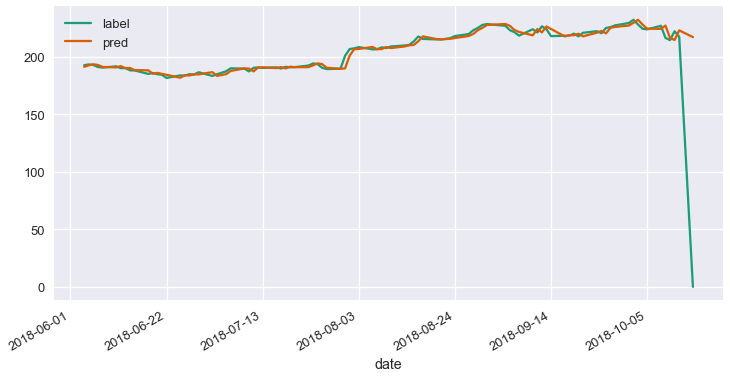

In [92]:
data[['label', 'pred']][data.index > pd.Timestamp('2018-06-01')].plot(figsize=(12,6))

In [93]:
result = result[result.pred > 0]

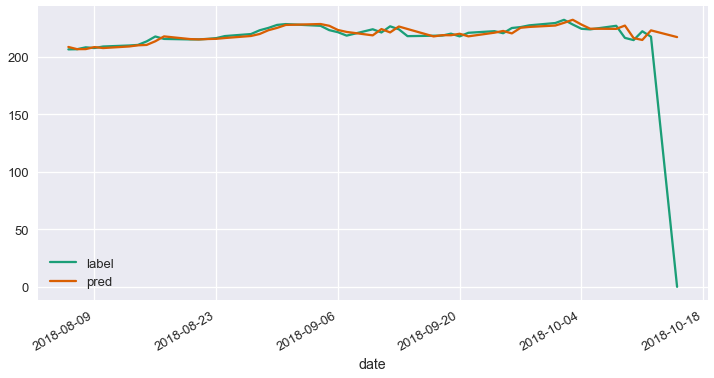

In [94]:
result[['label', 'pred']][-50:].plot(figsize=(12,6))

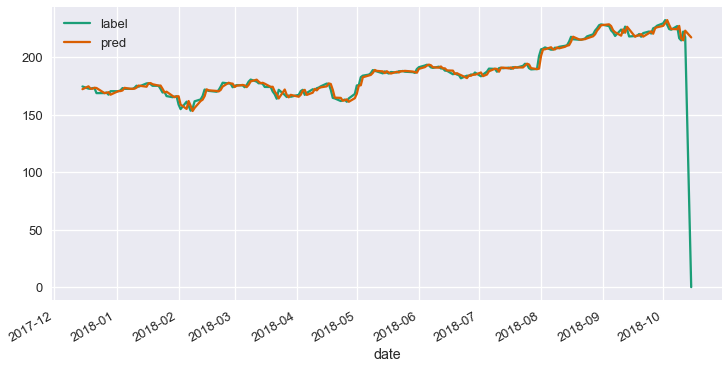

In [95]:
result[['label', 'pred']].plot(figsize=(12,6))

In [96]:
result.columns

Index(['close', 'label', 'pred'], dtype='object')

In [97]:
result.head()

,close,label,pred
date,,,
2017-12-15,171.9948,174.4170,172.056394
2017-12-18,174.4170,172.5583,174.523519
2017-12-19,172.5583,172.3705,172.510779
2017-12-20,172.3705,173.0230,172.436110
2017-12-21,173.0230,173.0230,173.284843


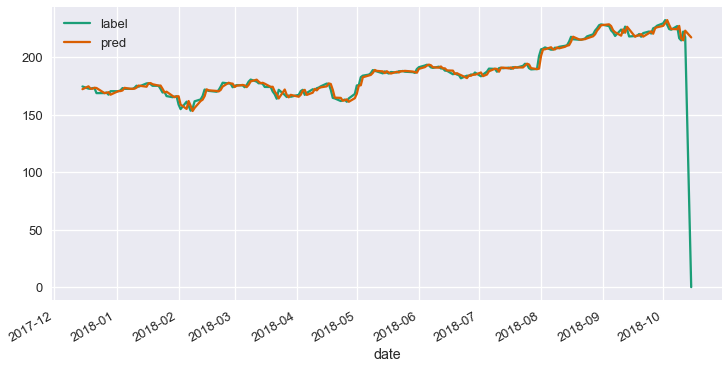

In [98]:
# print(direction)
result[['label', 'pred']].plot(figsize=(12,6))

In [99]:
trueExp = []
predExp = []

def conf_matrix(close, label, pred):
    for d in range(len(pred)):
        trueExp.append(True) if (label[d] > close[d]) else trueExp.append(False)
        predExp.append(True) if (pred[d] > close[d]) else predExp.append(False)
        
        
conf_matrix(data['close'], data['label'], data['pred'])
        

In [100]:
# print("predExp: ", predExp)
# print("trueExp: ", trueExp)

print("\nCONFUSION MATRIX:")

# How many predictions are correct?
b = np.array(trueExp).sum()
hits = len(predExp) - (np.array(predExp) ^ np.array(trueExp)).sum()
print(hits, "hits out of ", len(data['pred']))
print("Accuracy: ", 100 * hits/(len(predExp)),"%")



CONFUSION MATRIX:
611 hits out of  1254
Accuracy:  48.72408293460925 %


In [101]:
# Measuring the error

from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, confusion_matrix

mae = mean_absolute_error(data['label'],data['pred'])
mse = mean_squared_error(data['label'],data['pred'])


def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

k=len(result['pred'])
y_pred = result['pred'][:k-3]
y_true = result['label'][:k-3]

mape = mean_absolute_percentage_error(y_true, y_pred)

In [102]:
# mape_result = mape(np.array(data['pred']), np.array(data['label']))
# g = 100 * mape_result

print('Mean Absolute Error: %f' %mae)
print('Mean Squared Error: %f' %mse)
print('Mean Absolute Percentage Error: %f' %mape)


Mean Absolute Error: 91.797381
Mean Squared Error: 10593.622091
Mean Absolute Percentage Error: 1.062298


In [103]:
close_val= np.array(result['close'])
act_val= np.array(result['label'])
pred_val= np.array(result['pred'])

original_value = []
prediction_value = []


for i in range(len(pred_val)):
    original_value.append(True) if (act_val[i] > close_val[i]) else original_value.append(False)
    prediction_value.append(True) if (pred_val[i] > close_val[i]) else prediction_value.append(False)


original_value = np.array(original_value)
prediction_value = np.array(prediction_value)

#original_value
#prediction_value

In [104]:
TP = sum(np.bitwise_and(original_value == True, prediction_value == True))
FN = sum(np.bitwise_and(original_value == True, prediction_value == False))
TN = sum(np.bitwise_and(original_value == False, prediction_value == False))
FP = sum(np.bitwise_and(original_value == False, prediction_value == True))


In [105]:
print("True Positives TP:",TP)
print("False Negatives FN:",FN)
print("True Negatives TN:",TN)
print("False Positives FP:",FP)

True Positives TP: 86
False Negatives FN: 25
True Negatives TN: 24
False Positives FP: 74


In [106]:
total = TN + FN

print("ACCURACY: Overall, how often is this model correct?", (TP+TN)/total)
print("MISCLASSIFICATION RATE: Overall, how often is it wrong?", (FP+FN)/total)
print("TRUE POSITIVE RATE: When it is actually yes, how often does it predict yes?", (TP)/FN+TP)
print("FALSE POSITIVE RATE: When it is actual No, how often does it predict yes?", (FP)/TN+FP)
print("\n")

ACCURACY: Overall, how often is this model correct? 2.2448979591836733
MISCLASSIFICATION RATE: Overall, how often is it wrong? 2.020408163265306
TRUE POSITIVE RATE: When it is actually yes, how often does it predict yes? 89.44
FALSE POSITIVE RATE: When it is actual No, how often does it predict yes? 77.08333333333333




# Step 5 - add 2 more features from the “Type 2” category of features presented in the paper

In [107]:
data_new = df
data_new['ASY_3'] = (data_new.close - data_new.close.shift(1)).rolling(3).sum()/3

data_new.head()

,open,high,low,close,volume,momentum,log_ret,crash,down,up,...,stdNorm,stdL_R,MA_14,MA_3,MA_7,MA_21,label,ASY_3,MA_5,pred
date,,,,,,,,,,,,,,,,,,,,,
2013-10-23,67.8873,68.7598,67.8873,68.6669,78431122,0.6661,0.009748,0,0,0,...,0.054285,0.613894,0.0,68.288000,0.000000,0.0,69.5760,NaN,67.48392,0.0
2013-10-24,68.6722,69.6493,68.3386,69.5760,96191095,0.9091,0.013152,0,0,0,...,0.075289,0.851415,0.0,68.747900,0.000000,0.0,68.7975,NaN,68.20098,0.0
2013-10-25,69.4982,69.7487,68.6866,68.7975,84448133,-0.7785,-0.011252,1,0,0,...,-0.075267,-0.851172,0.0,69.013467,67.970443,0.0,69.3100,NaN,68.64750,0.0
2013-10-28,69.2006,69.4570,68.4380,69.3100,137610123,0.5125,0.007422,0,0,1,...,0.039936,0.451620,0.0,69.227833,68.444629,0.0,67.5836,0.214367,68.87024,0.0
2013-10-29,70.1463,70.5361,67.3040,67.5836,158952115,-1.7264,-0.025224,1,0,0,...,-0.161460,-1.825896,0.0,68.563700,68.590157,0.0,68.6586,-0.664133,68.78680,0.0


In [108]:
data_new['MA_5'] = data_new.close.rolling(5).mean()
data_new['label'] = data_new['close'].shift(-5)
data_new[['close','MA_5','ASY_3']].head(30)

,close,MA_5,ASY_3
date,,,
2013-10-23,68.6669,NaN,NaN
2013-10-24,69.5760,NaN,NaN
2013-10-25,68.7975,NaN,NaN
2013-10-28,69.3100,NaN,0.214367
2013-10-29,67.5836,68.78680,-0.664133
2013-10-30,68.6586,68.78514,-0.046300
2013-10-31,68.3716,68.54426,-0.312800
2013-11-01,68.0221,68.38918,0.146167
2013-11-04,68.9011,68.30740,0.080833


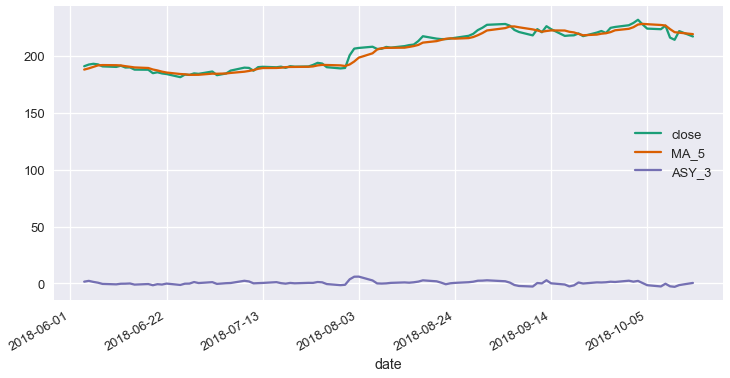

In [109]:
data[['close','MA_5', 'ASY_3']][data.index > pd.Timestamp('2018-06-01')].plot(figsize=(12,6))

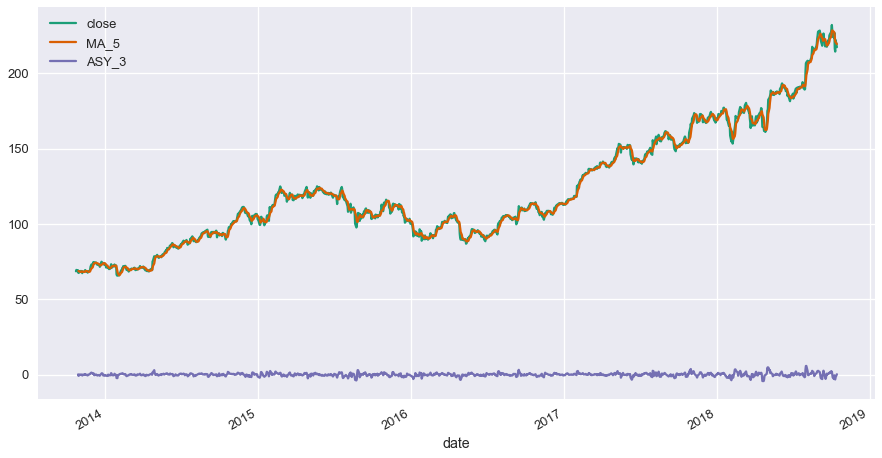

In [110]:
data[['close','MA_5', 'ASY_3']].plot(figsize=(15,8))

In [111]:
data[['close','label','pred','MA_5','ASY_3']]

,close,label,pred,MA_5,ASY_3
date,,,,,
2013-10-23,68.6669,68.6586,0.000000,NaN,NaN
2013-10-24,69.5760,68.3716,0.000000,NaN,NaN
2013-10-25,68.7975,68.0221,0.000000,NaN,NaN
2013-10-28,69.3100,68.9011,0.000000,NaN,0.214367
2013-10-29,67.5836,68.7309,0.000000,68.78680,-0.664133
2013-10-30,68.6586,68.5363,0.000000,68.78514,-0.046300
2013-10-31,68.3716,67.4275,0.000000,68.54426,-0.312800
2013-11-01,68.0221,68.4890,0.000000,68.38918,0.146167
2013-11-04,68.9011,68.2901,0.000000,68.30740,0.080833


In [112]:
data[['close','label','pred','MA_5','ASY_3','crash','down','up','jump']]

,close,label,pred,MA_5,ASY_3,crash,down,up,jump
date,,,,,,,,,
2013-10-23,68.6669,68.6586,0.000000,NaN,NaN,0,0,0,1
2013-10-24,69.5760,68.3716,0.000000,NaN,NaN,0,0,0,1
2013-10-25,68.7975,68.0221,0.000000,NaN,NaN,1,0,0,0
2013-10-28,69.3100,68.9011,0.000000,NaN,0.214367,0,0,1,0
2013-10-29,67.5836,68.7309,0.000000,68.78680,-0.664133,1,0,0,0
2013-10-30,68.6586,68.5363,0.000000,68.78514,-0.046300,0,0,0,1
2013-10-31,68.3716,67.4275,0.000000,68.54426,-0.312800,0,1,0,0
2013-11-01,68.0221,68.4890,0.000000,68.38918,0.146167,0,1,0,0
2013-11-04,68.9011,68.2901,0.000000,68.30740,0.080833,0,0,0,1


# Step 6 - design a decision for when to invest and when to sell based on your regression. 
## The model can be naïve, meaning you can create a rule (if .. X .. then .. Y)

In [113]:
data["decision"] = ""

for i in range (1, len(data.close)):
   if data.pred.iloc[i] > data.close.shift(1).iloc[i]:
       data.decision.iloc[i] = "BUY"
       if data.decision.shift(1).iloc[i] == "BUY":
           data.decision.iloc[i] = "HOLD"
   elif data.pred.iloc[i] == data.close.shift(1).iloc[i]:
       data.decision.iloc[i] = "HOLD"
   elif data.pred.iloc[i] < data.close.shift(1).iloc[i]:
       data.decision.iloc[i] = "SELL"
       if data.decision.shift(1).iloc[i] == "SELL":
           data.decision.iloc[i] = "HOLD"
   else:
       data.decision.iloc[i] = "HOLD"


C:\tools\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [114]:
data[['close','label','pred','decision']]

,close,label,pred,decision
date,,,,
2013-10-23,68.6669,68.6586,0.000000,
2013-10-24,69.5760,68.3716,0.000000,SELL
2013-10-25,68.7975,68.0221,0.000000,HOLD
2013-10-28,69.3100,68.9011,0.000000,SELL
2013-10-29,67.5836,68.7309,0.000000,HOLD
2013-10-30,68.6586,68.5363,0.000000,SELL
2013-10-31,68.3716,67.4275,0.000000,HOLD
2013-11-01,68.0221,68.4890,0.000000,SELL
2013-11-04,68.9011,68.2901,0.000000,HOLD
